In [232]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb

In [233]:
df = pd.read_excel("Data/circuit_outages_ibec.xlsx", sheet_name = "Circuit Outage", usecols= "A:G")
df.head()

,Circuit Number,Circuit Name,Outage Date,Outage CauseCode,Outage Cause,Outage Duration (min),Customers Affected
0,1,Orange,2024-01-05,8,Other,837,376
1,1,Orange,2024-08-27,3,Weather,515,1299
2,1,Orange,2024-11-10,4,Third Party,1169,862
3,2,Alabama,2024-03-13,1,UG Equipment Failure,227,1399
4,2,Alabama,2024-03-15,1,UG Equipment Failure,19,3198


In [234]:
df = df.rename(columns = {'Circuit Number':'circuit_number', 'Circuit Name':'circuit_name', 'Outage Date':'outage_date', 'Outage CauseCode':'outage_cause_code',
                    'Outage Cause':'outage_cause', 'Outage Duration (min)':'outage_duration', 'Customers Affected':'customers_affected'})
df.head()

,circuit_number,circuit_name,outage_date,outage_cause_code,outage_cause,outage_duration,customers_affected
0,1,Orange,2024-01-05,8,Other,837,376
1,1,Orange,2024-08-27,3,Weather,515,1299
2,1,Orange,2024-11-10,4,Third Party,1169,862
3,2,Alabama,2024-03-13,1,UG Equipment Failure,227,1399
4,2,Alabama,2024-03-15,1,UG Equipment Failure,19,3198


In [235]:
df_circuit_lookup = pd.read_excel("Data/circuit_outages_ibec.xlsx", sheet_name = "LookUp", usecols= "A:J")
df_outage_cause_lookup = pd.read_excel("Data/circuit_outages_ibec.xlsx", sheet_name = "LookUp", usecols= "L:M", nrows=8)

In [236]:
df_circuit_lookup.head()

,Circuit Number,Circuit Name,KV,Region,Customer Count,Circuit Miles,% Overhead,% Underground,2023 SAIDI,2023 SAIFI
0,1,Orange,4,Coastal,1299,45,90,10,1.68,0.002
1,2,Alabama,12,North,3447,29,82,18,0.57,0.001
2,3,Green,12,Coastal,2701,26,55,45,2.40,0.002
3,4,Oregon,16,Desert,1147,101,85,15,1.39,0.002
4,5,Yellow,4,North,1706,43,85,15,2.20,0.005


In [237]:
df_outage_cause_lookup.head()

,Outage Cause Code,Outage Cause
0,1,UG Equipment Failure
1,2,Vegetation
2,3,Weather
3,4,Third Party
4,5,Animal


In [238]:
df_circuit_lookup.columns

Index(['Circuit Number', 'Circuit Name', 'KV', 'Region', 'Customer Count',
       'Circuit Miles', '% Overhead', '% Underground', '2023 SAIDI',
       '2023 SAIFI'],
      dtype='object')

In [239]:
df_circuit_lookup = df_circuit_lookup.rename(columns={'Circuit Number':'circuit_number', 'Circuit Name':'circuit_name', 'KV':'voltage', 'Region':'region', 'Customer Count':'customer_count',
       'Circuit Miles':'circuit_miles', '% Overhead':'percent_overhead', '% Underground':'percent_underground', '2023 SAIDI':'avg_duration_of_outage_per_customer_2023',
       '2023 SAIFI':'outage_freq_per_365_days_2023'})
df_circuit_lookup.head()

,circuit_number,circuit_name,voltage,region,customer_count,circuit_miles,percent_overhead,percent_underground,avg_duration_of_outage_per_customer_2023,outage_freq_per_365_days_2023
0,1,Orange,4,Coastal,1299,45,90,10,1.68,0.002
1,2,Alabama,12,North,3447,29,82,18,0.57,0.001
2,3,Green,12,Coastal,2701,26,55,45,2.40,0.002
3,4,Oregon,16,Desert,1147,101,85,15,1.39,0.002
4,5,Yellow,4,North,1706,43,85,15,2.20,0.005


In [240]:
df_outage_cause_lookup.columns

Index(['Outage Cause Code', 'Outage Cause'], dtype='object')

In [241]:
df_outage_cause_lookup = df_outage_cause_lookup.rename(columns={'Outage Cause Code':'outage_cause_code', 'Outage Cause':'outage_cause'})
df_outage_cause_lookup.head()

,outage_cause_code,outage_cause
0,1,UG Equipment Failure
1,2,Vegetation
2,3,Weather
3,4,Third Party
4,5,Animal


In [242]:
df.describe

<bound method NDFrame.describe of     circuit_number circuit_name outage_date  outage_cause_code  \
0                1       Orange  2024-01-05                  8   
1                1       Orange  2024-08-27                  3   
2                1       Orange  2024-11-10                  4   
3                2      Alabama  2024-03-13                  1   
4                2      Alabama  2024-03-15                  1   
..             ...          ...         ...                ...   
95              21        Dinan  2024-04-14                  7   
96              21        Dinan  2024-04-24                  4   
97              21        Dinan  2024-05-28                  1   
98              21        Dinan  2024-07-29                  4   
99              21        Dinan  2024-10-17                  5   

            outage_cause  outage_duration  customers_affected  
0                  Other              837                 376  
1                Weather              515    

In [243]:
df.head()

,circuit_number,circuit_name,outage_date,outage_cause_code,outage_cause,outage_duration,customers_affected
0,1,Orange,2024-01-05,8,Other,837,376
1,1,Orange,2024-08-27,3,Weather,515,1299
2,1,Orange,2024-11-10,4,Third Party,1169,862
3,2,Alabama,2024-03-13,1,UG Equipment Failure,227,1399
4,2,Alabama,2024-03-15,1,UG Equipment Failure,19,3198


# Objective: Reduce number of outages, duration of outages 

In [244]:
# bar graph showing proportion of outages per circuit per voltage type 

In [245]:
# chi squared test for independence of 

In [246]:
result = duckdb.query("SELECT * from df").df()
print(result)

    circuit_number circuit_name outage_date  outage_cause_code  \
0                1       Orange  2024-01-05                  8   
1                1       Orange  2024-08-27                  3   
2                1       Orange  2024-11-10                  4   
3                2      Alabama  2024-03-13                  1   
4                2      Alabama  2024-03-15                  1   
..             ...          ...         ...                ...   
95              21        Dinan  2024-04-14                  7   
96              21        Dinan  2024-04-24                  4   
97              21        Dinan  2024-05-28                  1   
98              21        Dinan  2024-07-29                  4   
99              21        Dinan  2024-10-17                  5   

            outage_cause  outage_duration  customers_affected  
0                  Other              837                 376  
1                Weather              515                1299  
2            Th

In [247]:
merged.head()

,circuit_number,circuit_name,outage_date,outage_cause_code,outage_cause,outage_duration,customers_affected,voltage,region,customer_count,circuit_miles,percent_overhead,percent_underground,avg_duration_of_outage_per_customer,outage_freq_per_365_days
0,1,Orange,2024-01-05,8,Other,837,376,4,Coastal,1299,45,90,10,1.68,0.002
1,1,Orange,2024-08-27,3,Weather,515,1299,4,Coastal,1299,45,90,10,1.68,0.002
2,1,Orange,2024-11-10,4,Third Party,1169,862,4,Coastal,1299,45,90,10,1.68,0.002
3,2,Alabama,2024-03-13,1,UG Equipment Failure,227,1399,12,North,3447,29,82,18,0.57,0.001
4,2,Alabama,2024-03-15,1,UG Equipment Failure,19,3198,12,North,3447,29,82,18,0.57,0.001


In [248]:
# most common outage causes per region 

merged = df.merge(df_circuit_lookup.drop(columns = 'circuit_number'), on="circuit_name", how="inner")

outage_per_region = (
    merged
    .groupby(["region", "outage_cause"])
    .size()
    .reset_index(name="count")
    .sort_values(by=["region", "count"], ascending=[True, False])
    .reset_index(drop=True)
)

outage_per_region 


,region,outage_cause,count
0,Coastal,UG Equipment Failure,11
1,Coastal,Other,4
2,Coastal,Third Party,4
3,Coastal,Weather,3
4,Coastal,Animal,2
5,Coastal,Operation,2
6,Coastal,OH Equipment Failure,1
7,Coastal,Vegetation,1
8,Desert,OH Equipment Failure,5
9,Desert,Other,3


In [249]:
top_cause_per_region = (
    outage_per_region
    .sort_values(by=["region", "count"], ascending=[True, False])
    .groupby("region")
    .head(1)
    .reset_index(drop=True)
)
top_cause_per_region

,region,outage_cause,count
0,Coastal,UG Equipment Failure,11
1,Desert,OH Equipment Failure,5
2,Mountain,OH Equipment Failure,5
3,North,UG Equipment Failure,7


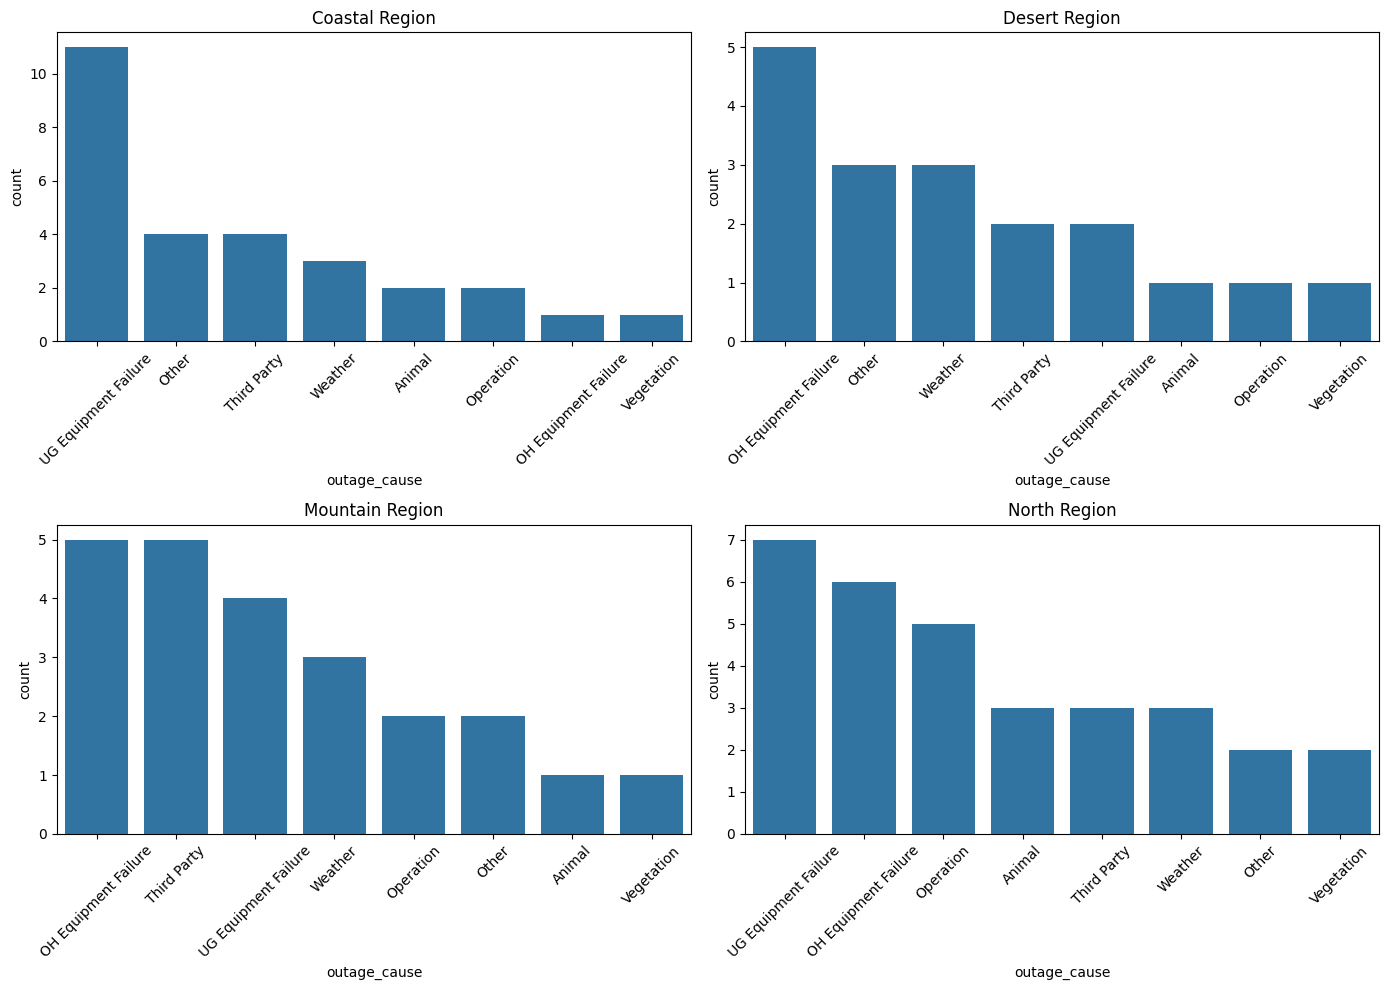

In [250]:
# histograms for most common outages per region
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

coastal = outage_per_region[outage_per_region["region"] == "Coastal"]
desert = outage_per_region[outage_per_region["region"] == "Desert"]
mountain = outage_per_region[outage_per_region["region"] == "Mountain"]
north = outage_per_region[outage_per_region["region"] == "North"]

sns.barplot(data=coastal, x="outage_cause", y="count", ax=axs[0, 0])
axs[0, 0].set_title("Coastal Region")
axs[0, 0].tick_params(axis='x', rotation=45)

sns.barplot(data=desert, x="outage_cause", y="count", ax=axs[0, 1])
axs[0, 1].set_title("Desert Region")
axs[0, 1].tick_params(axis='x', rotation=45)

sns.barplot(data=mountain, x="outage_cause", y="count", ax=axs[1, 0])
axs[1, 0].set_title("Mountain Region")
axs[1, 0].tick_params(axis='x', rotation=45)

sns.barplot(data=north, x="outage_cause", y="count", ax=axs[1, 1])
axs[1, 1].set_title("North Region")
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [251]:
# top outage causes 

top_outage_causes_2024 = (
    merged
    .groupby("outage_cause")
    .size()
    .reset_index(name="count")
    .sort_values(by='count', ascending = False)
    .reset_index(drop=True)
)

top_outage_causes_2024

,outage_cause,count
0,UG Equipment Failure,24
1,OH Equipment Failure,17
2,Third Party,14
3,Weather,12
4,Other,11
5,Operation,10
6,Animal,7
7,Vegetation,5


In [252]:
merged.head()

,circuit_number,circuit_name,outage_date,outage_cause_code,outage_cause,outage_duration,customers_affected,voltage,region,customer_count,circuit_miles,percent_overhead,percent_underground,avg_duration_of_outage_per_customer_2023,outage_freq_per_365_days_2023
0,1,Orange,2024-01-05,8,Other,837,376,4,Coastal,1299,45,90,10,1.68,0.002
1,1,Orange,2024-08-27,3,Weather,515,1299,4,Coastal,1299,45,90,10,1.68,0.002
2,1,Orange,2024-11-10,4,Third Party,1169,862,4,Coastal,1299,45,90,10,1.68,0.002
3,2,Alabama,2024-03-13,1,UG Equipment Failure,227,1399,12,North,3447,29,82,18,0.57,0.001
4,2,Alabama,2024-03-15,1,UG Equipment Failure,19,3198,12,North,3447,29,82,18,0.57,0.001


In [253]:
merged.dtypes

circuit_number                                       int64
circuit_name                                        object
outage_date                                 datetime64[ns]
outage_cause_code                                    int64
outage_cause                                        object
outage_duration                                      int64
customers_affected                                   int64
voltage                                              int64
region                                              object
customer_count                                       int64
circuit_miles                                        int64
percent_overhead                                     int64
percent_underground                                  int64
avg_duration_of_outage_per_customer_2023           float64
outage_freq_per_365_days_2023                      float64
dtype: object

In [254]:
# Circuits Ordered by total Customer Minutes Interrupted
merged['cmi'] = merged['customers_affected'] * merged['outage_duration'] 
merged.head()
total_cmi = (
    merged
    .groupby(['circuit_name', 'region', 'voltage'])['cmi']
    .sum()
    .reset_index(name='total_cmi')  
    .sort_values(by='total_cmi', ascending=False)
    .reset_index(drop=True)
)


total_cmi

,circuit_name,region,voltage,total_cmi
0,Magenta,Mountain,16,11931193
1,Logan,North,16,10733130
2,Green,Coastal,12,8412718
3,Dinan,Coastal,12,6052304
4,Alabama,North,12,5672058
5,Gorilla,Desert,16,5017832
6,Thunder,Mountain,16,4302974
7,Hoover,North,12,3807217
8,Yellow,North,4,3137676
9,Lincoln,Mountain,16,2631380


In [255]:
merged.head()

,circuit_number,circuit_name,outage_date,outage_cause_code,outage_cause,outage_duration,customers_affected,voltage,region,customer_count,circuit_miles,percent_overhead,percent_underground,avg_duration_of_outage_per_customer_2023,outage_freq_per_365_days_2023,cmi
0,1,Orange,2024-01-05,8,Other,837,376,4,Coastal,1299,45,90,10,1.68,0.002,314712
1,1,Orange,2024-08-27,3,Weather,515,1299,4,Coastal,1299,45,90,10,1.68,0.002,668985
2,1,Orange,2024-11-10,4,Third Party,1169,862,4,Coastal,1299,45,90,10,1.68,0.002,1007678
3,2,Alabama,2024-03-13,1,UG Equipment Failure,227,1399,12,North,3447,29,82,18,0.57,0.001,317573
4,2,Alabama,2024-03-15,1,UG Equipment Failure,19,3198,12,North,3447,29,82,18,0.57,0.001,60762


In [264]:
#  Outage Cause Average Duration Per Outage - 2024
outage_cause_avg_duration = (
    merged
    .groupby('outage_cause')['outage_duration']
    .mean()
    .reset_index(name='average_duration')
    .sort_values(by='average_duration', ascending = False)
    .reset_index(drop=True)
)
outage_cause_avg_duration

,outage_cause,average_duration
0,Operation,960.800000
1,Animal,906.285714
2,Third Party,885.000000
3,UG Equipment Failure,740.916667
4,Other,732.090909
5,Weather,709.666667
6,OH Equipment Failure,620.294118
7,Vegetation,452.000000


In [264]:
#  Outage Cause Average Duration - 2024
outage_cause_avg_duration = (
    merged
    .groupby('outage_cause')['outage_duration']
    .mean()
    .reset_index(name='average_duration')
    .sort_values(by='average_duration', ascending = False)
    .reset_index(drop=True)
)
outage_cause_avg_duration

,outage_cause,average_duration
0,Operation,960.800000
1,Animal,906.285714
2,Third Party,885.000000
3,UG Equipment Failure,740.916667
4,Other,732.090909
5,Weather,709.666667
6,OH Equipment Failure,620.294118
7,Vegetation,452.000000


In [280]:
#  Outage Cause Median Duration Per Outage - 2024
outage_cause_median_duration = (
    merged
    .groupby('outage_cause')['outage_duration']
    .median()
    .reset_index(name='median_duration')
    .sort_values(by='median_duration', ascending = False)
    .reset_index(drop=True)
)
outage_cause_median_duration

,outage_cause,median_duration
0,Operation,935.5
1,Third Party,926.5
2,Animal,868.0
3,Other,837.0
4,Weather,760.0
5,UG Equipment Failure,651.5
6,OH Equipment Failure,555.0
7,Vegetation,410.0


In [275]:
#  Average CMI per outage per outage cause 

outage_cause_avg_cmi = (
    merged
    .groupby('outage_cause')['cmi']
    .mean()
    .reset_index(name='average_cmi_per_outage')
    .sort_values(by='average_cmi_per_outage', ascending = False)
    .reset_index(drop=True)
)

outage_cause_avg_cmi['average_cmi_per_outage'] = (
    outage_cause_avg_cmi['average_cmi_per_outage'].round(2)
)
outage_cause_avg_cmi



,outage_cause,average_cmi_per_outage
0,Animal,1104097.57
1,Third Party,1011896.50
2,Other,819142.27
3,UG Equipment Failure,782651.08
4,Operation,713754.40
5,OH Equipment Failure,671559.12
6,Weather,458098.42
7,Vegetation,445867.20


In [278]:
# Median CMI per outage cause per outage 
outage_cause_median_cmi = (
    merged
    .groupby('outage_cause')['cmi']
    .median()
    .reset_index(name='median_cmi_per_outage')
    .sort_values(by='median_cmi_per_outage', ascending = False)
    .reset_index(drop=True)
)

outage_cause_median_cmi['median_cmi_per_outage'] = (
    outage_cause_median_cmi['median_cmi_per_outage'].round(2)
)
outage_cause_median_cmi

,outage_cause,median_cmi_per_outage
0,Third Party,840316.5
1,Animal,806382.0
2,Vegetation,512820.0
3,Operation,488365.0
4,Other,472524.0
5,UG Equipment Failure,401674.0
6,Weather,357557.5
7,OH Equipment Failure,350020.0


In [281]:
# Total CMI per outage cause 
outage_cause_total_cmi = (
    merged
    .groupby('outage_cause')['cmi']
    .median()
    .reset_index(name='total_cmi')
    .sort_values(by='total_cmi', ascending = False)
    .reset_index(drop=True)
)

outage_cause_total_cmi['total_cmi'] = (
    outage_cause_total_cmi['total_cmi'].round(2)
)
outage_cause_total_cmi

,outage_cause,total_cmi
0,Third Party,840316.5
1,Animal,806382.0
2,Vegetation,512820.0
3,Operation,488365.0
4,Other,472524.0
5,UG Equipment Failure,401674.0
6,Weather,357557.5
7,OH Equipment Failure,350020.0


In [ ]:
# CMI per region 
duckdb.query("""
SELECT 
    lookup.region, 
    SUM(df.outage_duration * df.customers_affected) AS region_CMI
FROM df
JOIN df_circuit_lookup AS lookup
ON df.circuit_name = lookup.circuit_name
GROUP BY lookup.region
ORDER BY region_CMI DESC
""").df()

In [ ]:
# total cmi per region 

duckdb.query("""
SELECT region, outage_cause, SUM(outage_duration * customers_affected) as total_CMI
FROM df 
JOIN df_circuit_lookup AS lookup 
ON df.circuit_name = lookup.circuit_name
GROUP BY region, outage_cause
ORDER BY region, total_CMI DESC

""").df()


In [ ]:
# average cmi per region 

duckdb.query("""
SELECT 
    region, 
    outage_cause, 
    ROUND(SUM(outage_duration * customers_affected) / COUNT(*), 2) AS avg_CMI_per_outage
FROM df 
JOIN df_circuit_lookup AS lookup 
    ON df.circuit_name = lookup.circuit_name
GROUP BY region, outage_cause
ORDER BY region, avg_CMI_per_outage DESC
""").df()


In [ ]:
df.columns

In [ ]:
# Outage Count per Cause for Circuit with over 50% underground 

outages_underground_circuits = duckdb.query("""
SELECT outage_cause, COUNT(*) AS count
FROM df
JOIN df_circuit_lookup AS lookup ON df.circuit_name = lookup.circuit_name
WHERE lookup.percent_underground > 50
GROUP BY outage_cause
ORDER BY count DESC
""").df()

outages_underground_circuits

In [ ]:
# Outage Count per Cause for Circuit with over 50% overhead 

duckdb.query("""
SELECT outage_cause, COUNT(*) AS count
FROM df
JOIN df_circuit_lookup AS lookup ON df.circuit_name = lookup.circuit_name
WHERE lookup.percent_overhead > 50
GROUP BY outage_cause
ORDER BY count DESC
""").df()

In [ ]:
# Proportion Of Outage Causes Per Region Per Overhead Circuit

In [ ]:
duckdb.query("""
SELECT 
    outage_cause,
    COUNT(*) AS outage_count_2024,
    ROUND(COUNT(*) / 365.0, 2) AS freq_per_day,
    ROUND(AVG(outage_duration / customers_affected), 2) AS avg_duration_per_customer
FROM df
WHERE outage_date BETWEEN '2024-01-01' AND '2024-12-31'
GROUP BY outage_cause
ORDER BY freq_per_day DESC
""").df()

In [ ]:
duckdb.query("""SELECT 
    lookup.region, 
    outage_cause, 
    SUM(outage_duration * customers_affected) AS total_CMI
FROM df
JOIN df_circuit_lookup AS lookup ON df.circuit_name = lookup.circuit_name
GROUP BY region, outage_cause
ORDER BY region, total_CMI DESC
""").df()

In [ ]:
duckdb.query("""
SELECT 
    lookup.voltage, 
    df.circuit_name,
    COUNT(*) AS outage_count,
    ROUND(COUNT(*) * 1.0 / SUM(COUNT(*)) OVER (PARTITION BY lookup.voltage), 3) AS proportion_within_voltage
FROM df
JOIN df_circuit_lookup AS lookup ON df.circuit_name = lookup.circuit_name
GROUP BY lookup.voltage, df.circuit_name
ORDER BY voltage, proportion_within_voltage DESC
""").df()

In [ ]:
df.head(20)

In [ ]:
plt.figure(figsize=(15,10
                   ))
plt.hist(df['circuit_name'])

In [ ]:
sns.histplot(df['outage_duration'], bins=50, shrink=0.8)